In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

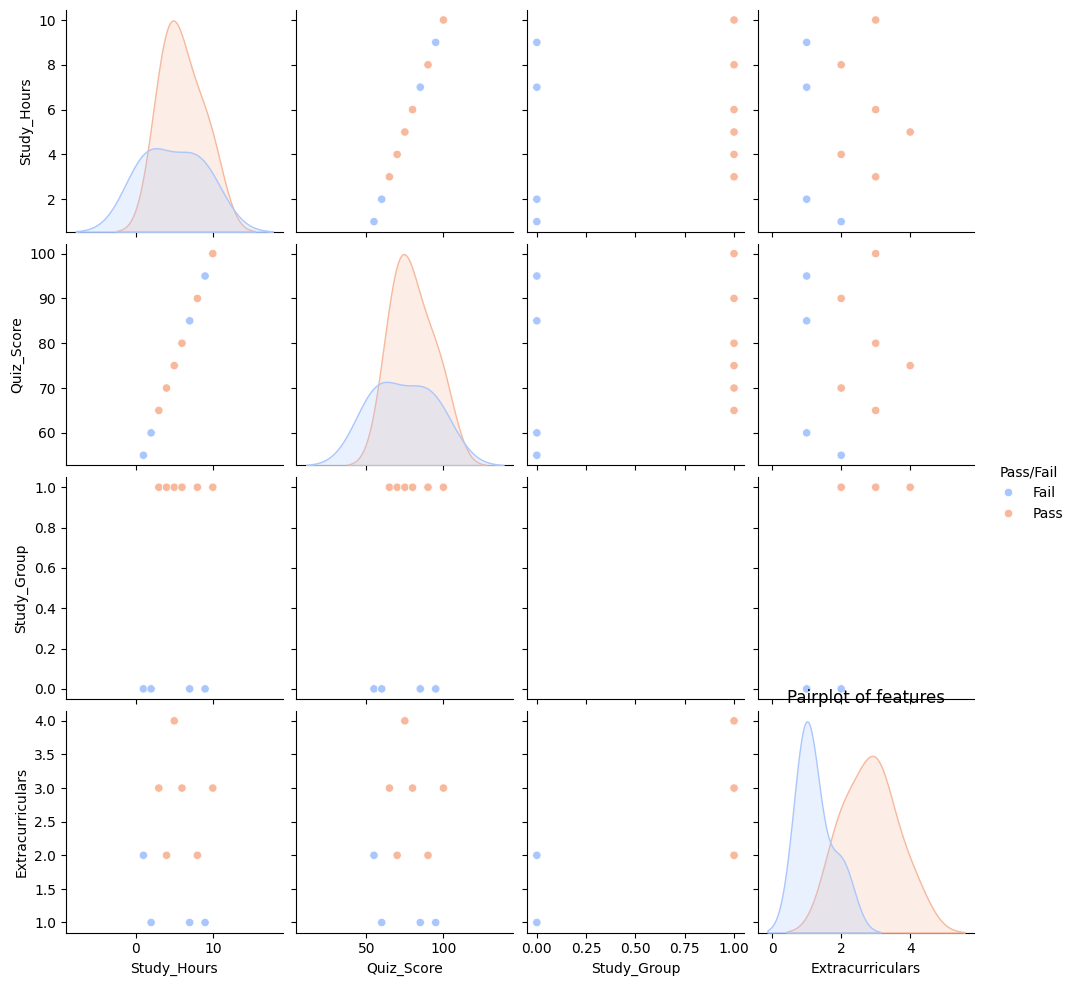

Updated Mean Quiz Score: 77.5
Updated Median Quiz Score: 77.5
Updated Mode Quiz Score:55


In [42]:
df = pd.DataFrame({
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Quiz_Score': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'Study_Group': [0, 0, 1, 1, 1, 1, 0, 1, 0, 1],
    'Extracurriculars': [2, 1, 3, 2, 4, 3, 1, 2, 1, 3],
    'Pass/Fail': ['Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass']
})
sns.pairplot(df, hue=('Pass/Fail'), palette='coolwarm')
plt.title("Pairplot of features")
plt.show()
quiz_scores = df['Quiz_Score']
mean_score = np.mean(quiz_scores)
median_score = np.median(quiz_scores)
mode_score = df['Quiz_Score'].mode()[0]
print(f"Updated Mean Quiz Score: {mean_score}")
print(f"Updated Median Quiz Score: {median_score}")
print(f"Updated Mode Quiz Score:{mode_score}")
X_class = df[['Study_Hours', 'Study_Group', 'Extracurriculars']]
y_class = df['Pass/Fail'].map({'Fail': 0, 'Pass': 1})
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = 0.3, random_state=42)
X_reg = df['Study_Hours']
y_reg = df['Quiz_Score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size = 0.3, random_state = 42)

In [43]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train_class, y_train_class)
y_test_pred_class = tree.predict(X_test_class)
print(f"Decision Tree Accuracy: {accuracy_score(y_test_class, y_test_pred_class):.2f}")
print("Decision Tree Classfication Report:", classification_report(y_test_class, y_test_pred_class))
print("Confusion Matrix: ", confusion_matrix(y_test_class, y_test_pred_class))
forest = RandomForestClassifier(n_estimators=100, random_state = 42)
forest.fit(X_train_class, y_train_class)
y_test_pred_class = forest.predict(X_test_class)
print(f"Random Forest Accuracy: {accuracy_score(y_test_class, y_test_pred_class):.2f}")
print("Random Forest Classification Report: ", classification_report(y_test_class, y_test_pred_class))
print("Confusion Matrix: ", confusion_matrix(y_test_class, y_test_pred_class))

Decision Tree Accuracy: 1.00
Decision Tree Classfication Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:  [[2 0]
 [0 1]]
Random Forest Accuracy: 1.00
Random Forest Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:  [[2 0]
 [0 1]]


In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_class, y_train_class)
y_test_pred_class = knn.predict(X_test_class)
print(f"KNN Accuracy: {accuracy_score(y_test_class, y_test_pred_class):.2f}")
underfit_tree = DecisionTreeClassifier(max_depth=1, random_state = 42)
underfit_tree.fit(X_train_class, y_train_class)
y_test_pred_underfit = underfit_tree.predict(X_test_class)
print(f"Underfitting Decision Tree Accuracy: {accuracy_score(y_test_class, y_test_pred_underfit):.2f}")
overfit_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
overfit_tree.fit(X_train_class, y_train_class)
y_test_pred_overfit = overfit_tree.predict(X_test_class)
print(f"Overfitting Decision Tree Accuracy: {accuracy_score(y_test_class, y_test_pred_overfit):.2f}")

KNN Accuracy: 0.33
Underfitting Decision Tree Accuracy: 1.00
Overfitting Decision Tree Accuracy: 1.00


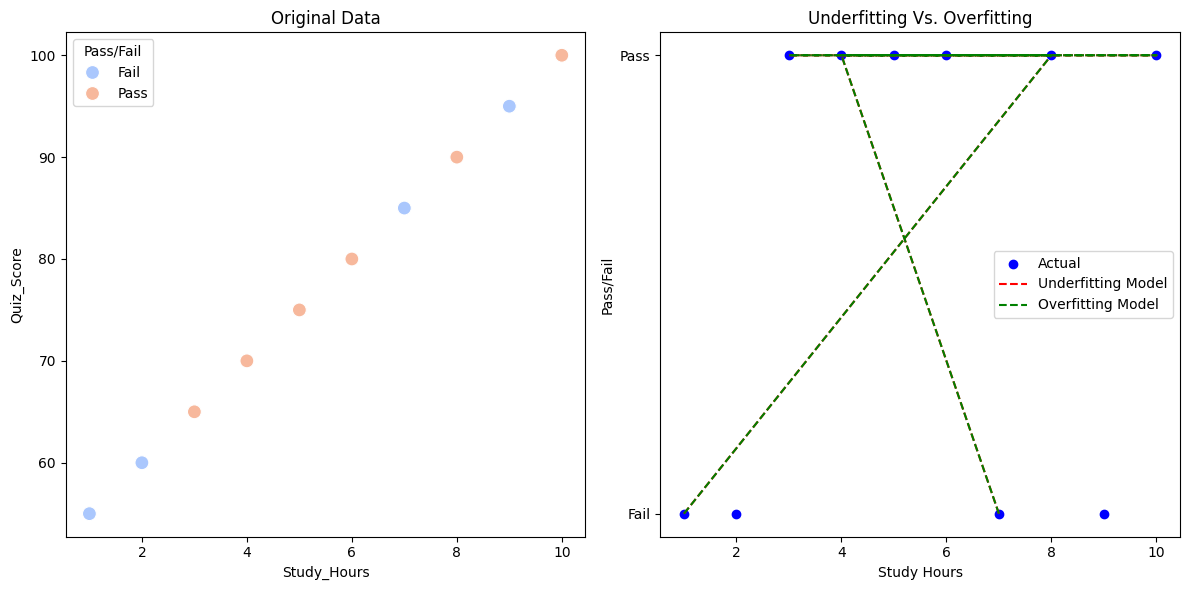

In [60]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Study_Hours', y='Quiz_Score', hue='Pass/Fail', palette='coolwarm', s=100)
plt.title("Original Data")
plt.subplot(1, 2, 2)
plt.scatter(X_class['Study_Hours'], y_class.map({0: 'Fail', 1: 'Pass'}), color='blue', label='Actual')
plt.plot(X_train_class['Study_Hours'], underfit_tree.predict(X_train_class), color='red', label='Underfitting Model', linestyle='--')
plt.plot(X_train_class['Study_Hours'], overfit_tree.predict(X_train_class), color='green', label='Overfitting Model', linestyle='--')
plt.xlabel('Study Hours')
plt.ylabel('Pass/Fail')
plt.legend()
plt.title("Underfitting Vs. Overfitting")
plt.tight_layout()
plt.show()